In [1]:
import os
import torch
import torch.nn as nn
from torch import optim
import matplotlib.pyplot as plt
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor

import pandas as pd
import base64
from PIL import Image
import io
import numpy as np
import sqlite3

In [2]:
CURR_PATH = os.getcwd()
PROJECT_PATH = os.path.dirname(CURR_PATH)
DATA_PATH = os.path.join(PROJECT_PATH, 'data')
TRAIN_PATH = os.path.join(DATA_PATH, 'train')
TEST_PATH = os.path.join(DATA_PATH, 'test')
RES_PATH = os.path.join(PROJECT_PATH, 'res')
MODELS_PATH = os.path.join(PROJECT_PATH, 'models')
RLHF_PATH = os.path.join(DATA_PATH, 'RLHF.db')

# Check if GPU is available, and set the device accordingly
device =  torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# check folder is exist, if not then create folder
def check_path(folderPaths:list):
    for folderPath in folderPaths:
        if not os.path.exists(folderPath):
            os.makedirs(folderPath)

In [4]:
# check path
check_path([
    TRAIN_PATH, TEST_PATH,
])

In [5]:
# download training & test data and put in DATA_PATH
mnist_trainset = datasets.MNIST(
    root=TRAIN_PATH, 
    train=True, 
    download=True, 
    transform=ToTensor()
)

mnist_testset = datasets.MNIST(
    root=TEST_PATH, 
    train=False, 
    download=True, 
    transform=ToTensor()
)

In [6]:
mnist_trainset

Dataset MNIST
    Number of datapoints: 60000
    Root location: c:\Users\isaac\Desktop\GitHub\Digit-Draw-Detection\backEnd\data\train
    Split: Train
    StandardTransform
Transform: ToTensor()

In [7]:
type(mnist_trainset)

torchvision.datasets.mnist.MNIST

In [8]:
mnist_trainset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [9]:
type(mnist_trainset[0])

tuple

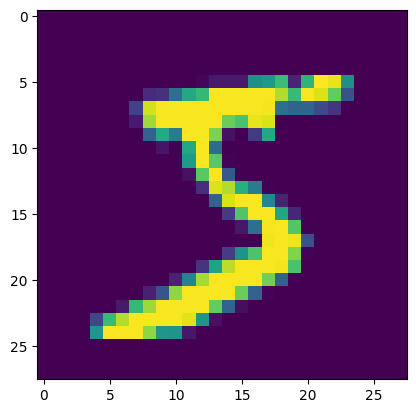

In [10]:
plt.imshow(mnist_trainset[0][0].permute(1, 2, 0))

In [11]:
# Data Prep
train_dataloader = DataLoader(
    mnist_trainset, 
    batch_size=20, 
    shuffle=True, 
    num_workers=0,
    pin_memory=True
)

test_dataloader = DataLoader(
    mnist_testset, 
    batch_size=20, 
    shuffle=False, 
    num_workers=0,
    pin_memory=True
)

In [12]:
for i, (images, labels) in enumerate(train_dataloader):
    images, labels = images.to(device), labels.to(device)
    print("######-IMAGE-######")
    print(images.shape)
    print("######-LABELS-######")
    print(labels.shape)

######-IMAGE-######
torch.Size([20, 1, 28, 28])
######-LABELS-######
torch.Size([20])
######-IMAGE-######
torch.Size([20, 1, 28, 28])
######-LABELS-######
torch.Size([20])
######-IMAGE-######
torch.Size([20, 1, 28, 28])
######-LABELS-######
torch.Size([20])
######-IMAGE-######
torch.Size([20, 1, 28, 28])
######-LABELS-######
torch.Size([20])
######-IMAGE-######
torch.Size([20, 1, 28, 28])
######-LABELS-######
torch.Size([20])
######-IMAGE-######
torch.Size([20, 1, 28, 28])
######-LABELS-######
torch.Size([20])
######-IMAGE-######
torch.Size([20, 1, 28, 28])
######-LABELS-######
torch.Size([20])
######-IMAGE-######
torch.Size([20, 1, 28, 28])
######-LABELS-######
torch.Size([20])
######-IMAGE-######
torch.Size([20, 1, 28, 28])
######-LABELS-######
torch.Size([20])
######-IMAGE-######
torch.Size([20, 1, 28, 28])
######-LABELS-######
torch.Size([20])
######-IMAGE-######
torch.Size([20, 1, 28, 28])
######-LABELS-######
torch.Size([20])
######-IMAGE-######
torch.Size([20, 1, 28, 28])
######

In [13]:
train_dataloader.dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

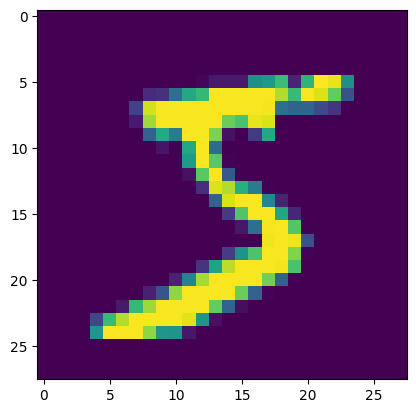

In [14]:
plt.imshow(train_dataloader.dataset[0][0].permute(1, 2, 0))

In [15]:
train_dataloader.dataset[0][0].shape

torch.Size([1, 28, 28])

In [16]:
from torch.utils.data import Dataset

In [17]:
def preprocess_base64(image):
    # Decode the base64-encoded image string
    image_string = base64.b64decode(image)
    
    # Open and preprocess the image
    image = Image.open(io.BytesIO(image_string))
    image = image.convert('1') # Convert to black and white
    image = image.resize((28,28)) # Resize the image

    # Convert the image to a PyTorch tensor and move it to the specified device
    image_torch = torch.tensor(np.float32(np.array(image)))

    return image_torch.view(1, 28,28)

def get_data(sql_path, tableName):
    # connecting sql
    conn = sqlite3.connect(sql_path)

    # query to pandas on forecast table
    df = pd.read_sql_query(f"SELECT * FROM {tableName}", conn)

    return df

df = get_data(RLHF_PATH, 'train_digit')

In [18]:
preprocess_base64(df['image'][0])

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,

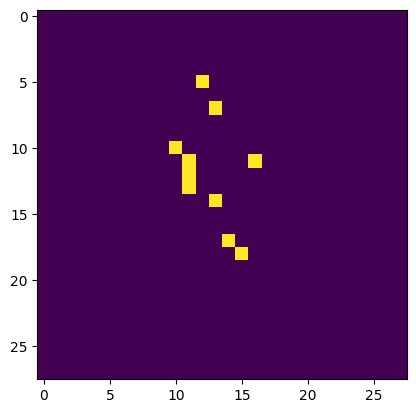

In [19]:
plt.imshow(preprocess_base64(df['image'][0]).permute(1, 2, 0))

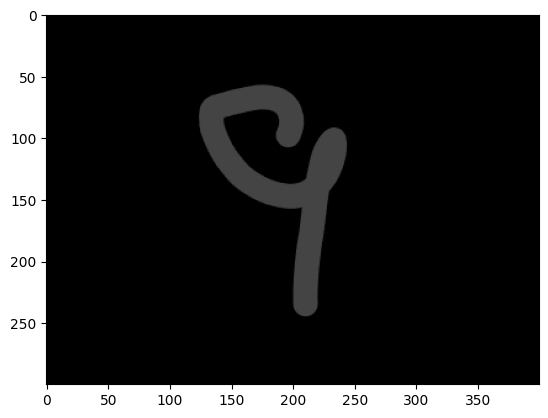

In [20]:
# Decode the base64-encoded image string
image_string = base64.b64decode(df['image'][0])
# Open and preprocess the image
image = Image.open(io.BytesIO(image_string))
plt.imshow(image)

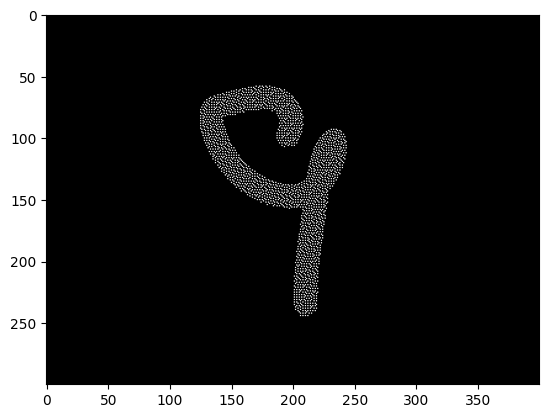

In [21]:
plt.imshow(image.convert('1'))

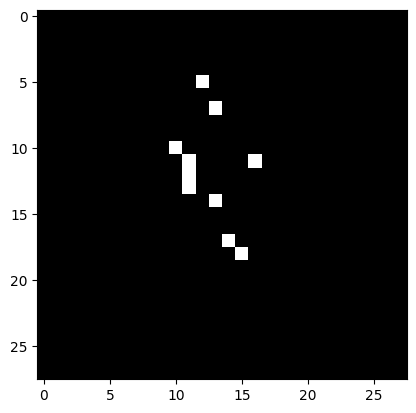

In [22]:
plt.imshow(image.convert('1').resize((28, 28)))

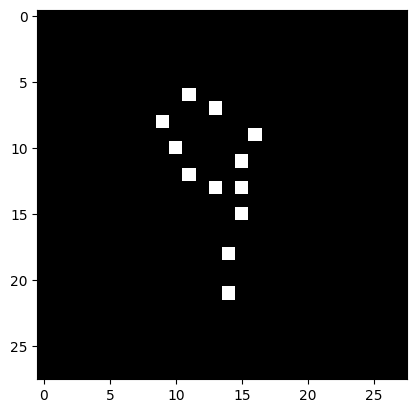

In [23]:
image = image.resize((28,28)) # Resize the image
image = image.convert('1') # Convert to black and white

plt.imshow(image.convert('1'))

# Convert the cropped image to a NumPy array
image_array = np.array(image)

In [24]:
image_torch = torch.tensor(np.float32(image_array))
image_torch.shape

torch.Size([28, 28])

In [25]:
def preprocess_base64_v2(image):
    # Decode the base64-encoded image string
    image_string = base64.b64decode(image)
    
    # Open and preprocess the image
    image = Image.open(io.BytesIO(image_string))
    image = image.resize((28,28)) # Resize the image

    # convert to black and white
    cropped_image = image.convert('1')

    # Convert the image to a PyTorch tensor and move it to the specified device
    image_torch = torch.tensor(np.float32(np.array(cropped_image)))

    return image_torch.view(1, 28,28)

In [26]:
class RLHF_SQL(Dataset):
    def __init__(self, db_path, tableName, transform=preprocess_base64):
        self.db_path = db_path
        self.connection = sqlite3.connect(db_path)
        self.cursor = self.connection.cursor()
        self.tableName = tableName
        self.transform = transform

    def __len__(self):
        # Implement the length method to return the total number of samples in the dataset
        self.cursor.execute(f"SELECT COUNT(*) FROM {self.tableName}")
        return self.cursor.fetchone()[0]

    def __getitem__(self, idx):
        # Fetch a single sample from the database based on the index idx
        query = f"SELECT * FROM {self.tableName} LIMIT 1 OFFSET ?"
        self.cursor.execute(query, (idx,))
        data = self.cursor.fetchone()

        # Extract image and label from the fetched data
        image = self.transform(data[0])  # Assuming image is stored in the first column
        label = np.int64(data[1])  # Assuming label is stored in the second column

        return image, label

In [27]:
custom_dataset = RLHF_SQL(
    db_path=RLHF_PATH, 
    tableName='train_digit', 
    transform=preprocess_base64_v2
)

dataloader = DataLoader(custom_dataset, batch_size=2, shuffle=True)

In [28]:
dataloader.dataset[2]

(tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 

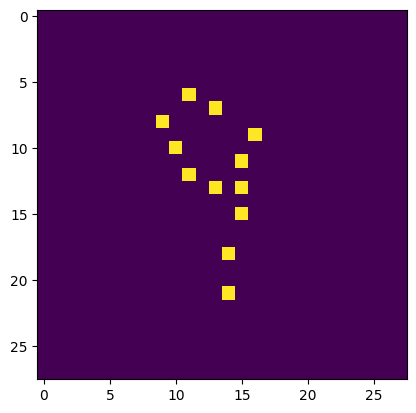

In [29]:
plt.imshow(dataloader.dataset[0][0].permute(1, 2, 0))

In [30]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        # First Convolutional Layer
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,              
                out_channels=16,            
                kernel_size=5,              
                stride=1,                   
                padding=2,                  
            ),
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        
        # Second Convolutional Layer
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 5, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        
        # Fully Connected Layer for Classification
        self.out = nn.Linear(32 * 7 * 7, 10)

    def forward(self, x):
        # Forward pass through the first convolutional layer
        x = self.conv1(x)
        
        # Forward pass through the second convolutional layer
        x = self.conv2(x)
        
        # Flatten the output for the fully connected layer
        x = x.view(x.size(0), -1)  # flattening the layer      
        
        # Forward pass through the fully connected layer for classification
        output = self.out(x)
        
        return output

In [31]:
# Instantiate the CNN model and move it to the specified device (GPU or CPU)
cnn_model = CNN().to(device)

# Define the loss function (cross-entropy) - for classification problem
loss_function = nn.CrossEntropyLoss()

# Define the optimizer (Adam) for updating the model parameters during training
optimizer = optim.Adam(cnn_model.parameters(), lr=0.005)

In [32]:
def calculate_accuracy(model_output, target):
    # get the prediction
    predictions = torch.max(model_output, 1)[1].data.squeeze()
    
    # get the accuracy
    accuracy = (predictions == target).sum().item()/float(target.size(0))
    return accuracy

In [33]:
custom_dataset = RLHF_SQL(
    db_path=RLHF_PATH, 
    tableName='train_digit', 
    transform=preprocess_base64
)

sql_train_dataloader = DataLoader(custom_dataset, batch_size=2, shuffle=True)

In [34]:
for i, (images, labels) in enumerate(sql_train_dataloader):
    print("######-IMAGE-######")
    print(images.shape)
    print("######-LABELS-######")
    print(labels.shape)

######-IMAGE-######
torch.Size([2, 1, 28, 28])
######-LABELS-######
torch.Size([2])
######-IMAGE-######
torch.Size([2, 1, 28, 28])
######-LABELS-######
torch.Size([2])
######-IMAGE-######
torch.Size([2, 1, 28, 28])
######-LABELS-######
torch.Size([2])
######-IMAGE-######
torch.Size([1, 1, 28, 28])
######-LABELS-######
torch.Size([1])


In [40]:
# model training 
cnn_model.train()

for epoch in range(10):
    
    epoch_loss = 0
    epoch_accuracy = 0
    i = 0
    for i, (images, labels) in enumerate(sql_train_dataloader):

        images, labels = images.to(device), labels.to(device)
        
        # Forward pass
        output = cnn_model(images)
        
        # Calculate loss
        loss = loss_function(output, labels)
        
        # Releasing the cache
        optimizer.zero_grad() 
        
        # Backward Pass
        loss.backward()

        # Update model parameter
        optimizer.step()

        # accummulate the loss and accuracy for each epoch
        epoch_loss += loss.item()
        epoch_accuracy += calculate_accuracy(output, labels)

    print(f"Epoch: {epoch} - Loss: {epoch_loss} - Accuracy: {epoch_accuracy/(i+1)}")

Epoch: 0 - Loss: 9.80027174949646 - Accuracy: 0.125
Epoch: 1 - Loss: 7.749500274658203 - Accuracy: 0.375
Epoch: 2 - Loss: 5.711557984352112 - Accuracy: 0.25
Epoch: 3 - Loss: 4.691486179828644 - Accuracy: 0.625
Epoch: 4 - Loss: 2.8775796853005886 - Accuracy: 0.75
Epoch: 5 - Loss: 1.8857014924287796 - Accuracy: 1.0
Epoch: 6 - Loss: 1.1481033563613892 - Accuracy: 1.0
Epoch: 7 - Loss: 0.9275987073779106 - Accuracy: 1.0
Epoch: 8 - Loss: 0.1250532791018486 - Accuracy: 1.0
Epoch: 9 - Loss: 0.09709581152492319 - Accuracy: 1.0


In [44]:
cnn_model.eval
output = cnn_model(sql_train_dataloader.dataset[0][0].view((-1, 1, 28, 28)).to(device))

In [45]:
predictions = torch.max(output, 1)[1].data.squeeze()

In [46]:
predictions

tensor(9, device='cuda:0')